In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('amir_deals.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17
...,...,...,...,...,...
173,Product A,Current,Lost,5835.32,23
174,Product D,Current,Won,6377.50,12
175,Product D,Current,Won,3537.61,28
176,Product A,Current,Won,6448.07,34


In [3]:
product_counts = df['product'].value_counts()
product_counts

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

In [14]:
# .sample(n) - randomly chooses n amount of values
product_counts.sample(4)

Product H     8
Product G     2
Product N     3
Product A    23
Name: product, dtype: int64

In [11]:
# We can get the same value over and over again
np.random.seed(5)
product_counts.sample(3, replace = False)
# 15, 7, 7 - replace = True; each one is independent - can be selected more than once
# 8, 3, 23 - replace = False; dependent of prev one - can't be selected more than once

Product H     8
Product N     3
Product A    23
Name: product, dtype: int64

In [ ]:
# Sampling WITH and WITHOUT replacement

In [26]:
# With replacement - flip a coint 3 times; roll a dice 2 times

# When outcome of the first, doesn't change the probability of the second event
# Each pcik is independent -- 1,2,3,4 - all will always have 25% probability
product_counts.sample(4, replace = True)

Product H     8
Product E     5
Product B    62
Product D    40
Name: product, dtype: int64

In [27]:
# Without replacement - randomly pick 3 people from 30 - 
# - each human will have higher probability to be chooses each time
# When each item is unique - and we can't choose the same item twice

# When outcome of the first, changes the probability of the second
# Each pick is dependent - 1,2,3,4 - 25% - took 2 - 1,3,4 - 33% - took 4 - 1,3 - 50%
product_counts.sample(4)

Product J     2
Product B    62
Product C    15
Product H     8
Name: product, dtype: int64

In [29]:
# Count the deals for each product
counts = df['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [30]:
# Probability = number of ways event can happen / total number of possible outcomes
# Calculate probability of picking a deal with each product
probs = counts / df['product'].count()
print(probs) #We get probability ro get each product

# Here we can see whuch Products has higher Probability to be choosen while Sampling

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


<BarContainer object of 11 artists>

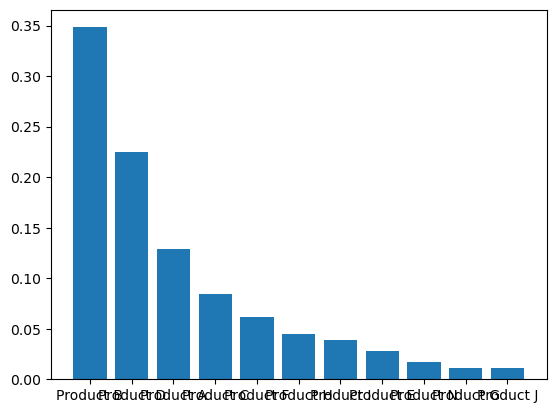

In [35]:
plt.bar(probs.index, probs.values)

In [37]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = df.sample(5)
sample_without_replacement

,product,client,status,amount,num_users
127,Product B,Current,Won,2070.25,7
148,Product D,Current,Won,3485.48,52
77,Product B,Current,Won,6252.30,27
104,Product D,Current,Won,4110.98,39
166,Product C,New,Lost,3779.86,11


# Discrete Distributions

In [ ]:
# Probability distribution - describes the probability of each possibel outcome in a scenario

# Expected value: mean of a probability distribution
# (1 * 1/6) + (2 * 1/6) + (3 * 1/6) + (4 * 1/6) + (5 * 1/6) + (6 * 1/6) = 3.5 - this value we expect to get

In [ ]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=np.linspace(2,6,5))
plt.show()

In [ ]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

In [ ]:
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

In [ ]:
# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

In [ ]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

In [ ]:
# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

In [ ]:
# But we can see that np.mean(rolls10['numbers']) = 3.0 but expected 3.5
# and  np.mean(rolls1000['numbers']) = 3.48

# So, the bigger the size of your sample the closer 
# the sample mean to expected value